![Alt text](https://imgur.com/orZWHly.png=80)

source: @[allison_horst](https://github.com/allisonhorst/penguins)

## The Data

The data was collected about penguins in Antartica! It's available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns:**

Column | Description
--- | ---
culmen_length_mm | bill length (mm)
culmen_depth_mm | bill depth (mm) 
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, the species of penguin weren't recorded, but researchers, who collected it, know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  

## Clustering Plan

I'll utilize my unsupervised learning skills to help identify clusters in the penguins dataset!

---

Import, investigate and pre-process the "penguins.csv" dataset.
Perform a cluster analysis based on a reasonable number of clusters and collect the average values for the clusters. The output should be a DataFrame named stat_penguins with one row per cluster that shows the mean of the original variables (or columns in "penguins.csv") by cluster. stat_penguins should not include any non-numeric columns.

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [83]:
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


### Preprocessing

1. Handling missing values

In [84]:
penguins_df.isna().sum()
# There are no missing values in this dataset!

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### Preprocessing

2. encoding categorical features

In [85]:
# dtype='int' ensure the output will be 0/1 instead of True/False
# 	this will not affect the KMeans clustering when the data is scaled 
# 	because both integer and unsigned integer data types will behave the same when scaled.
X = pd.get_dummies(data=penguins_df, columns=['sex'], dtype='int').values

### Preprocessing

3. Scaling

In [86]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
# Scaling variables (also called standardizing) is generally recommended before performing running a model since this can increase
# the performance greatly (see https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)

#### Detect the optimal number of clusters for k-means clustering

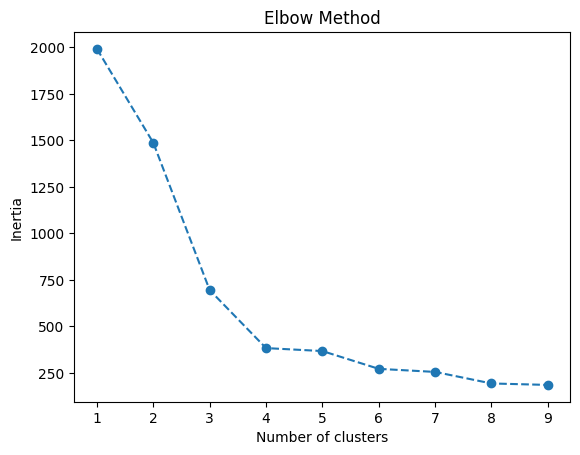

In [88]:
inertia_values = []
for k in range(1, 10):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_X)
    inertia_values.append(model.inertia_)

plt.plot(range(1, 10), inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

n_clusters = 4

### Clustering

In [89]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(scaled_X)
labels = kmeans.labels_  # equivalent to: `labels = kmeans.fit_predict(scaled_X)`

### Visualizing clusters

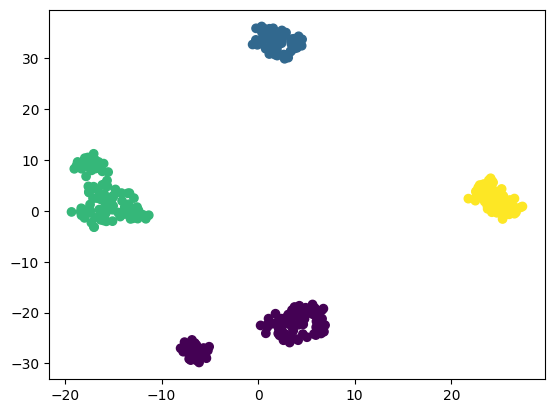

In [90]:
# First, let's transform our data points from its 6D space to a corresponding one of 2 dimensional space
tsne = TSNE(learning_rate=50)
transformed_features = tsne.fit_transform(scaled_X)

xs = transformed_features[:, 0]
ys = transformed_features[:, 1]

# visualization
plt.scatter(xs, ys, c=labels)
plt.show()

##### Calculate the average values of the clusters

In [91]:
penguins_df['label'] = labels
stat_penguins = penguins_df.groupby('label').mean(numeric_only=True)
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,45.563793,14.237931,212.706897,4679.741379
2,40.217757,17.611215,189.046729,3419.158879
3,49.473770,15.718033,221.540984,5484.836066
